# Logistic Regression Examples

+ Using the Iris dataset

## Data Generation

### Packages

In [2]:
%matplotlib inline
# data and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# modeling packages
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

### Display Settings

In [3]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'


### Data Loading

In [4]:
# load the iris dataset from sklearn; note sklearn does not use pandas dataframes
iris = load_iris()
# anatomy of the data object
print("feature_names: {}".format(iris.feature_names))
print("feature_shape: {}".format(iris.data.shape))
print("target_names: {}".format(iris.target_names))
print("target_shape: {}".format(iris.target.shape))
#print(iris.DESCR)

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature_shape: (150, 4)
target_names: ['setosa' 'versicolor' 'virginica']
target_shape: (150,)


### Logistic Regression Fit

We fit a Logistic Regression classifier using only two attributes

In [5]:
lgm = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
lgm.fit(iris.data[:, :2],  iris.target)

y_pred = lgm.predict(iris.data[:,0:2])
n_fail = (iris.target != y_pred).sum()
print("Total points: {0}; Mislabeled points: {1}".format(iris.data.shape[0], n_fail))


Total points: 150; Mislabeled points: 25


In [6]:
# first create a 2D grid of npts x npts points for sepal_length and sepal_width
# the numpy function meshgrid returns the coordinates
npts = 100
X, Y = np.meshgrid(np.linspace(4.0, 8.5, npts), np.linspace(1.5, 5, npts))
# then we compute the model predictions for each point on the grid
Z = np.array([lgm.predict([[x, y]])[0] for x, y in zip(np.ravel(X), np.ravel(Y))])
# we reshape the prediction array to be npts x npts
Z = Z.reshape(X.shape)

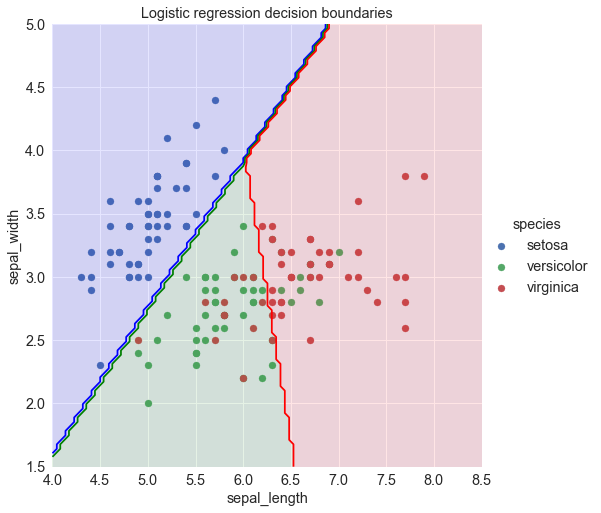

In [7]:
# create the dataframe
iris_df = pd.DataFrame(index=iris.target, data=iris.data, columns=iris.feature_names)
iris_df.rename(index={0:'setosa', 1:'versicolor', 2:'virginica'}, inplace=True)
iris_df.index.names=['species']
iris_df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df.reset_index(level=0, inplace=True)
# plot a filled contour and a boundary contour
g = sn.FacetGrid(iris_df, hue='species', height=7).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
g.ax.contourf(X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
g.ax.contour(X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))
g.ax.set_xlabel('sepal_length')
g.ax.set_ylabel('sepal_width')
g.ax.set_title('Logistic regression decision boundaries');

### Logistic Regression Fit with all Four Attributes

In [8]:
lgm1 = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
lgm1.fit(iris.data, iris.target)

y1_pred = lgm1.predict(iris.data)
n1_fail = (iris.target != y1_pred).sum()
print("Total points: {0}; Mislabeled points: {1}".format(iris.data.shape[0], n1_fail))

Total points: 150; Mislabeled points: 2
